## 1.1 Загрузка данных

загружаем все библиотеки  

In [ ]:
import pandas as  pd 
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew

In [26]:
# загружаем первый датасет 
data1 = pd.read_csv('Dataset_с_данными_о_пассажирских_потоках_за_выделенный_период_по.csv' , encoding = 'PT154' , sep = ';')
data1

,date,hour,line,station,num_val
0,2023-01-01,0,АРБАТСК-ПОКРОВСК,Арбатская АПЛ,373
1,2023-01-01,0,АРБАТСК-ПОКРОВСК,Бауманская,157
2,2023-01-01,0,АРБАТСК-ПОКРОВСК,Волоколамская,12
3,2023-01-01,0,АРБАТСК-ПОКРОВСК,Волоколамская,41
4,2023-01-01,0,АРБАТСК-ПОКРОВСК,Измайловская,34
...,...,...,...,...,...
2161997,2023-08-21,23,ФИЛЁВСКАЯ,Студенческая,60
2161998,2023-08-21,23,ФИЛЁВСКАЯ,Фили,171
2161999,2023-08-21,23,ФИЛЁВСКАЯ,Фили,22
2162000,2023-08-21,23,ФИЛЁВСКАЯ,Филёвский парк,38


In [27]:
# загружаем второй 
data2 = pd.read_csv('Dataset_с_параметрами_пропускной_способности_станций.csv' , encoding = 'PT154' , sep = ';')
data2

,line_id,line_name,station_id,station_name,entry_id,entry_name,input_doors_count,input_doors_bandwidth,input_doors_total_bandwidth,input_doors_note,...,output_turnstile_note,output_stairs_width,output_stairs_bandwidth,output_stairs_total_bandwidth,output_stairs_note,output_escalator_count,output_escalator_bandwidth,output_escalator_total_bandwidth,note,stop_id
0,12,АРБАТСК-ПОКРОВСК,126,Киевская АПЛ,6,Город,4,3.2,12.8,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000055
1,12,АРБАТСК-ПОКРОВСК,126,Киевская АПЛ,7,Пригород,7,3.2,22.4,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000055
2,12,АРБАТСК-ПОКРОВСК,129,Смоленская АПЛ,5,Центр,3,3.2,9.6,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000056
3,12,АРБАТСК-ПОКРОВСК,131,Арбатская АПЛ,5,Центр,4,3.2,12.8,NaN,...,реверс,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000057
4,12,АРБАТСК-ПОКРОВСК,133,Пл. Революции,3,Запад,4,3.2,12.8,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,13,ФИЛЁВСКАЯ,174,Филёвский парк,3,Запад,2,3.2,6.4,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000075
289,13,ФИЛЁВСКАЯ,174,Филёвский парк,4,Восток,2,3.2,6.4,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000075
290,13,ФИЛЁВСКАЯ,177,Пионерская,3,Запад,2,3.2,6.4,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000076
291,13,ФИЛЁВСКАЯ,177,Пионерская,4,Восток,2,3.2,6.4,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000076


In [28]:
# переназываем  колонки  для удоства и объедиенения  двух  таблиц  в одну  
data2.rename(columns = {'station_name':'station'}, inplace = True )

In [44]:
data1.to_csv('data_base1.csv')
data2.to_csv('data_base2.csv')

два  файла  я  сохрнаил  в формат  цсв  , чтобы их  проше было  загрузить в  базу данных  , чтобы подключиться  к базе(база посттгрес так как для хрпанения таблоиц лучше использовать  релеационную  базу ) использовал  дб бивер так как он  поддерживает много  баз , и исходя их  исходной структуры  загрузил  таблицы  

так же при загрузке cvs  я  учел  обработку исключений , при ошибках данная  строчка игнорируется 

In [29]:
# объеденили в один  набор 
data = data1.merge(data2)

In [30]:
data

,date,hour,line,station,num_val,line_id,line_name,station_id,entry_id,entry_name,...,output_turnstile_note,output_stairs_width,output_stairs_bandwidth,output_stairs_total_bandwidth,output_stairs_note,output_escalator_count,output_escalator_bandwidth,output_escalator_total_bandwidth,note,stop_id
0,2023-01-01,0,АРБАТСК-ПОКРОВСК,Арбатская АПЛ,373,12,АРБАТСК-ПОКРОВСК,131,5,Центр,...,реверс,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000057
1,2023-01-01,1,АРБАТСК-ПОКРОВСК,Арбатская АПЛ,6,12,АРБАТСК-ПОКРОВСК,131,5,Центр,...,реверс,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000057
2,2023-01-01,2,АРБАТСК-ПОКРОВСК,Арбатская АПЛ,1,12,АРБАТСК-ПОКРОВСК,131,5,Центр,...,реверс,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000057
3,2023-01-01,3,АРБАТСК-ПОКРОВСК,Арбатская АПЛ,2,12,АРБАТСК-ПОКРОВСК,131,5,Центр,...,реверс,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000057
4,2023-01-01,5,АРБАТСК-ПОКРОВСК,Арбатская АПЛ,38,12,АРБАТСК-ПОКРОВСК,131,5,Центр,...,реверс,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416930,2023-08-21,19,КАЛУЖСКО-РИЖСКАЯ,Пр-кт Мира КРЛ,1757,15,КАЛУЖСКО-РИЖСКАЯ,251,5,Центр,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000099
2416931,2023-08-21,20,КАЛУЖСКО-РИЖСКАЯ,Пр-кт Мира КРЛ,1132,15,КАЛУЖСКО-РИЖСКАЯ,251,5,Центр,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000099
2416932,2023-08-21,21,КАЛУЖСКО-РИЖСКАЯ,Пр-кт Мира КРЛ,627,15,КАЛУЖСКО-РИЖСКАЯ,251,5,Центр,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000099
2416933,2023-08-21,22,КАЛУЖСКО-РИЖСКАЯ,Пр-кт Мира КРЛ,360,15,КАЛУЖСКО-РИЖСКАЯ,251,5,Центр,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000099


так же добавление новых  атрибутов будет в пункте  1.2

## 1.2 Предобработка данных и выделение значимых атрибутов

In [31]:
# смотрим  на  количество дубликатов  и  находим 
data.duplicated().sum()

13321

In [32]:
# удаляем
data =data.drop_duplicates()

In [52]:
# сохраняем  объедеиненый  набор для  добавления в базу 
data.to_csv('data_base.csv')

In [23]:
# размер
data.shape

(2403614, 43)

## добавления новых  данных 

источник  https://data.mos.ru/opendata/624/description?version=5&release=145&versionNumber=5&releaseNumber=5

In [33]:
dop_data = pd.read_csv('data-624-2024-06-05.csv' , sep = ';')

In [34]:
dop_data 

,global_id,ID,Name,OnTerritoryOfMoscow,AdmArea,District,Longitude_WGS84,Latitude_WGS84,VestibuleType,NameOfStation,...,ModeOnEvenDays,ModeOnOddDays,FullFeaturedBPAAmount,LittleFunctionalBPAAmount,BPAAmount,RepairOfEscalators,ObjectStatus,geoData,geodata_center,Unnamed: 21
0,global_id,Локальный идентификатор,Наименование,На территории Москвы,Административный округ,Район,Долгота в WGS-84,Широта в WGS-84,Тип вестибюля,Станция метрополитена,...,Режим работы по чётным дням,Режим работы по нечётным дням,Количество полнофункциональных БПА (все типы б...,Количество малофункциональных БПА (билеты на 1...,Общее количество БПА,Ремонт эскалаторов,Статус объекта,geoData,geodata_center,NaN
1,1773539,331,"Китай-город, вход-выход 5 в северный вестибюль",да,Центральный административный округ,Басманный район,37.63176509,55.75732811,подземный,Китай-город,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,NaN,4,4,nested data,действует,"{coordinates=[37.63176509, 55.75732811], type=...","{coordinates=[37.63176509, 55.75732811], type=...",NaN
2,1773540,327,"Китай-город, вход-выход 4 в северный вестибюль",да,Центральный административный округ,Тверской район,37.63092407,55.75673268,подземный,Китай-город,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,NaN,4,4,nested data,действует,"{coordinates=[37.63092407, 55.75673268], type=...","{coordinates=[37.63092407, 55.75673268], type=...",NaN
3,1773541,330,"Китай-город, вход-выход 7 в северный вестибюль",да,Центральный административный округ,Басманный район,37.63186197,55.75702717,подземный,Китай-город,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,NaN,4,4,nested data,действует,"{coordinates=[37.63186197, 55.75702717], type=...","{coordinates=[37.63186197, 55.75702717], type=...",NaN
4,1773542,322,"Китай-город, вход-выход 13 в южный вестибюль",да,Центральный административный округ,Тверской район,37.63320674,55.75299870,подземный,Китай-город,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,NaN,4,4,nested data,действует,"{coordinates=[37.63320674, 55.7529987], type=P...","{coordinates=[37.63320674, 55.7529987], type=P...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,2658155817,1366,"Арбатская (Арбатско-Покровская линия), вход-вы...",да,Центральный административный округ,район Арбат,37.61013908,55.75224452,подземный,Арбатская,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,2,2,4,nested data,действует,"{coordinates=[37.61013908, 55.75224452], type=...","{coordinates=[37.61013908, 55.75224452], type=...",NaN
1121,2658155828,1367,"Фили, вход в западный вестибюль",да,Западный административный округ,район Филёвский Парк,37.51411273,55.74674501,наземный отдельностоящий,Фили,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,3,2,5,nested data,действует,"{coordinates=[37.51411273, 55.74674501], type=...","{coordinates=[37.51411273, 55.74674501], type=...",NaN
1122,2658155848,1368,"Фили, вход в восточный вестибюль",да,Западный административный округ,район Филёвский Парк,37.51576680,55.74530038,наземный отдельностоящий,Фили,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,3,2,5,nested data,действует,"{coordinates=[37.5157668, 55.74530038], type=P...","{coordinates=[37.5157668, 55.74530038], type=P...",NaN
1123,2658155890,1369,"Верхние Лихоборы, вход-выход 2 (2) в вестибюль 2",да,Северный административный округ,Бескудниковский район,37.56026334,55.85767075,подземный,Верхние Лихоборы,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,NaN,4,4,nested data,действует,"{coordinates=[37.56026334, 55.85767075], type=...","{coordinates=[37.56026334,

In [10]:
dop_data[dop_data['Line'] == 'Филёвская линия']

,global_id,ID,Name,OnTerritoryOfMoscow,AdmArea,District,Longitude_WGS84,Latitude_WGS84,VestibuleType,NameOfStation,...,ModeOnEvenDays,ModeOnOddDays,FullFeaturedBPAAmount,LittleFunctionalBPAAmount,BPAAmount,RepairOfEscalators,ObjectStatus,geoData,geodata_center,Unnamed: 21
72,1773623,855,"Александровский сад, вход-выход 6 в западный в...",да,Центральный административный округ,район Арбат,37.60905279,55.75226513,подземный,Александровский сад,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,1,NaN,1,nested data,действует,"{coordinates=[37.60905279, 55.75226513], type=...","{coordinates=[37.60905279, 55.75226513], type=...",NaN
201,1773757,43,"Кунцевская, вход-выход 2 в западный вестибюль (Ф)",да,Западный административный округ,район Кунцево,37.44547089,55.73068215,наземный отдельностоящий,Кунцевская,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,NaN,3,3,nested data,действует,"{coordinates=[37.44547089, 55.73068215], type=...","{coordinates=[37.44547089, 55.73068215], type=...",NaN
202,1773758,46,"Кунцевская, вход-выход 1 в восточный вестибюль...",да,Западный административный округ,район Фили-Давыдково,37.44646868,55.73083653,наземный отдельностоящий,Кунцевская,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,NaN,5,5,nested data,действует,"{coordinates=[37.44646868, 55.73083653], type=...","{coordinates=[37.44646868, 55.73083653], type=...",NaN
209,1773765,843,"Кутузовская, вход-выход 4 в южный вестибюль (Ф)",да,Западный административный округ,район Дорогомилово,37.53430245,55.74062975,наземный отдельностоящий,Кутузовская,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,NaN,2,2,nested data,действует,"{coordinates=[37.53430245, 55.74062975], type=...","{coordinates=[37.53430245, 55.74062975], type=...",NaN
210,1773766,844,"Кутузовская, вход-выход 1 в северный вестибюль",да,Западный административный округ,район Дорогомилово,37.53499577,55.73946516,наземный отдельностоящий,Кутузовская,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,NaN,2,2,nested data,действует,"{coordinates=[37.53499577, 55.73946516], type=...","{coordinates=[37.53499577, 55.73946516], type=...",NaN
263,1773825,869,"Москва-Сити, вход-выход 3 в вестибюль 2",да,Центральный административный округ,Пресненский район,37.53356887,55.74789091,подземный,Москва-Сити,...,"открытие в 05:30:00, закрытие в 01:00:00, перв...","открытие в 05:30:00, закрытие в 01:00:00, перв...",1,3,4,nested data,действует,"{coordinates=[37.53356887, 55.74789091], type=...","{coordinates=[37.53356887, 55.74789091], type=...",NaN
305,1773869,839,"Пионерская, вход-выход 2 в восточный вестибюль",да,Западный административный округ,район Фили-Давыдково,37.46748350,55.73609102,наземный отдельностоящий,Пионерская,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,1,NaN,1,nested data,действует,"{coordinates=[37.4674835, 55.73609102], type=P...","{coordinates=[37.4674835, 55.73609102], type=P...",NaN
317,1773883,838,"Пионерская, вход-выход 1 в западный вестибюль",да,Западный административный округ,район Фили-Давыдково,37.46677540,55.73596693,наземный отдельностоящий,Пионерская,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,1,NaN,1,nested data,действует,"{coordinates=[37.4667754, 55.73596693], type=P...","{coordinates=[37.4667754, 55.73596693], type=P...",NaN
329,1773896,841,"Филёвский парк, вход-выход 1 в западный вестибюль",да,Западный административный округ,район Фили-Давыдково,37.48289946,55.73943413,наземный отдельностоящий,Филёвский парк,...,открытие в 05:30:00; закрытие в 01:00:00; перв...,открытие в 05:30:00; закрытие в 01:00:00; перв...,1,NaN,1,nested data,действует,"{coordinates=[37.48289946, 55.73943413], type=...","{c

In [37]:
dop_data = dop_data[['Line' ,'VestibuleType'] ]

In [38]:
dop_data = dop_data[1 : 1124]


In [39]:
dop_data

,Line,VestibuleType
2,Калужско-Рижская линия,подземный
3,Калужско-Рижская линия,подземный
4,Калужско-Рижская линия,подземный
5,Калужско-Рижская линия,подземный
6,Калужско-Рижская линия,подземный
...,...,...
1119,Сокольническая линия,подземный
1120,Арбатско-Покровская линия,подземный
1121,Филёвская линия,наземный отдельностоящий
1122,Филёвская линия,наземный отдельностоящий


In [40]:
dop_data['Line'] = dop_data['Line'].str.upper()

In [41]:
dop_data['Line'] =  dop_data['Line'].str[:-6]

In [42]:
dop_data.rename(columns = {'Line':'line'}, inplace = True )

In [43]:
dop_data

,line,VestibuleType
2,КАЛУЖСКО-РИЖСКАЯ,подземный
3,КАЛУЖСКО-РИЖСКАЯ,подземный
4,КАЛУЖСКО-РИЖСКАЯ,подземный
5,КАЛУЖСКО-РИЖСКАЯ,подземный
6,КАЛУЖСКО-РИЖСКАЯ,подземный
...,...,...
1119,СОКОЛЬНИЧЕСКАЯ,подземный
1120,АРБАТСКО-ПОКРОВСКАЯ,подземный
1121,ФИЛЁВСКАЯ,наземный отдельностоящий
1122,ФИЛЁВСКАЯ,наземный отдельностоящий


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2403614 entries, 0 to 2416934
Data columns (total 43 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   date                              object 
 1   hour                              int64  
 2   line                              object 
 3   station                           object 
 4   num_val                           int64  
 5   line_id                           int64  
 6   line_name                         object 
 7   station_id                        int64  
 8   entry_id                          int64  
 9   entry_name                        object 
 10  input_doors_count                 int64  
 11  input_doors_bandwidth             float64
 12  input_doors_total_bandwidth       float64
 13  input_doors_note                  float64
 14  input_turnstile_count             int64  
 15  input_turnstile_bandwidth         float64
 16  input_turnstile_total_bandwidth   float64

<Axes: >

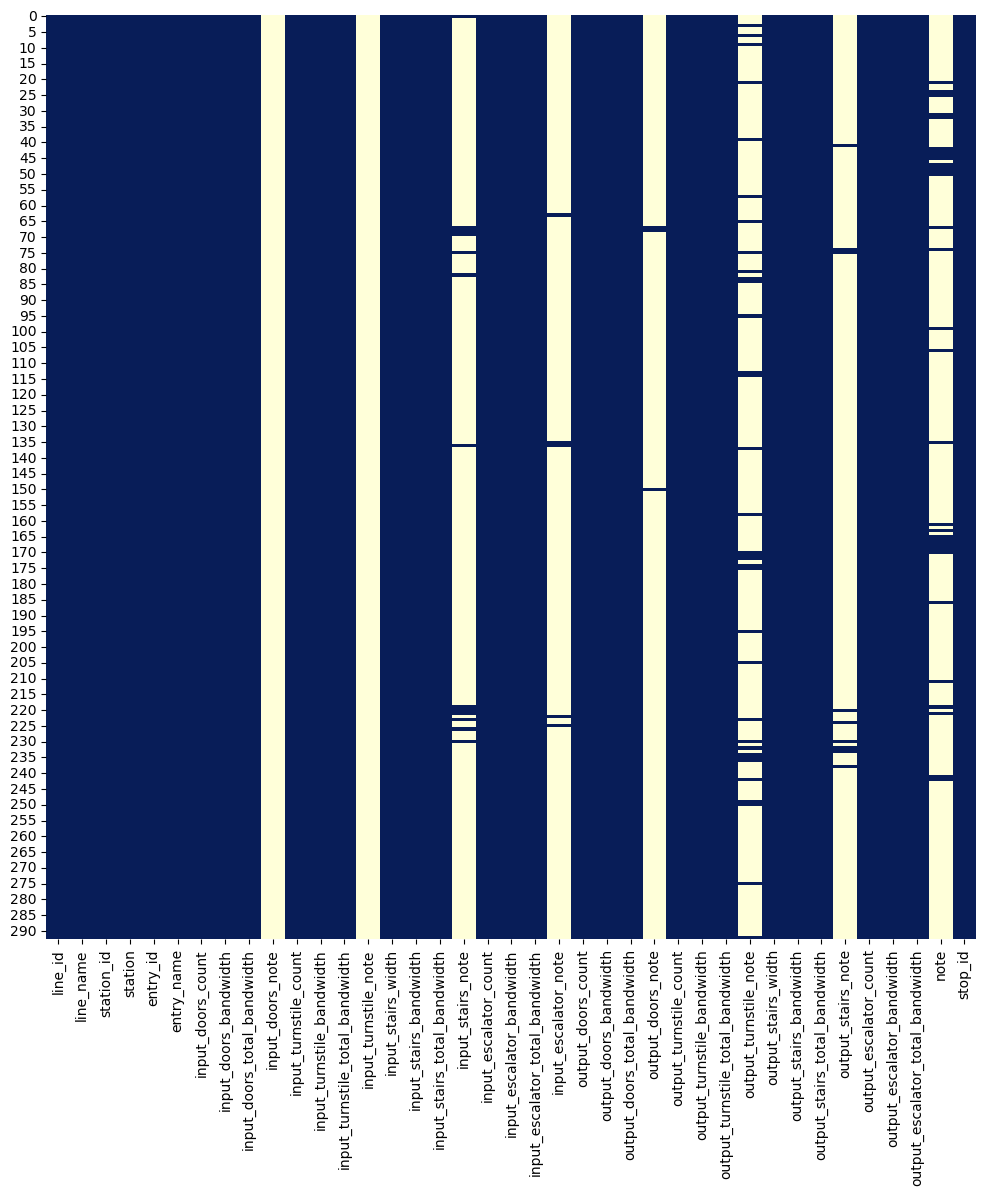

In [34]:
plt.figure(figsize = (12,12))
sns.heatmap(data.isnull(),cmap="YlGnBu_r",cbar=False)

чтобы  уменьших  количество  данных  я  посмотрел  матрицу пропуском у объединенного  датасета  , и там я увидел  очень мало значений в определнных  колонках 

что у меня и получилось 

In [44]:
data.drop(['input_doors_note' , 'input_turnstile_note' , 'input_stairs_note' , 'input_escalator_note' ,'output_doors_note' , 'output_turnstile_note' ,
           'output_stairs_note' , 'note'] , axis = 1 , inplace = True)

/tmp/ipykernel_47732/1217090892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['input_doors_note' , 'input_turnstile_note' , 'input_stairs_note' , 'input_escalator_note' ,'output_doors_note' , 'output_turnstile_note' ,


<Axes: >

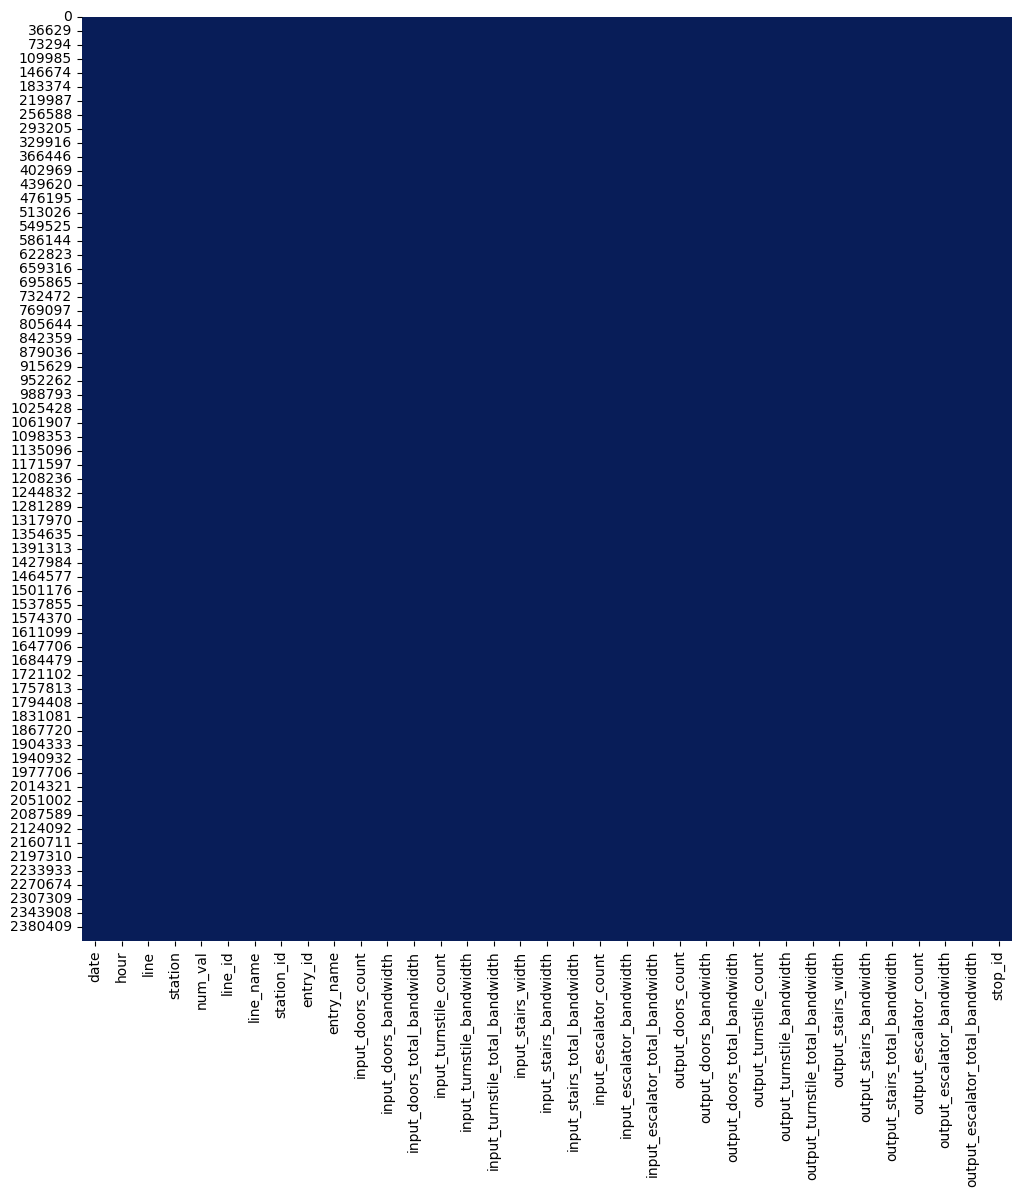

In [38]:
plt.figure(figsize = (12,12))
sns.heatmap(data.isnull(),cmap="YlGnBu_r",cbar=False)

после  удаления  колонок  с  пропущенным значениями  , их не осталось  , замену на  какое  то число или числовую  характеристики  я не расмсатривал , так как  на визуализации видчто , что количество пропуском  больше  80 процентов  и даже при заполнении весомой  информации это мне не даст 

при объединение так  же  появились колонки  с  одинаковыми  значениями  и мы и удаляем

In [45]:
data.drop(['line_name' ] , axis = 1 , inplace = True)

/tmp/ipykernel_47732/1473299429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['line_name' ] , axis = 1 , inplace = True)


In [20]:

def remove_constant_columns(df):
    # Проверяем, есть ли в столбце только одна уникальная строка
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]

    # Удаляем эти столбцы
    return df.drop(columns=constant_columns)

In [21]:
data = remove_constant_columns(data)

In [ ]:
import numpy as np
col_types = {"id": np.int32}
df = pd.read_csv('data.csv', dtypes=col_types)

In [22]:
data.shape

(2403614, 34)

In [57]:
dop_data =dop_data.drop_duplicates()

In [58]:
dop_data

,line,VestibuleType
2,КАЛУЖСКО-РИЖСКАЯ,подземный
10,ЛЮБЛИНСКО-ДМИТРОВСКАЯ,подземный
12,БУТОВСКАЯ ЛИНИЯ ЛЁГКОГО,наземный отдельностоящий
13,СЕРПУХОВСКО-ТИМИРЯЗЕВСКАЯ,подземный
16,БОЛЬШАЯ КОЛЬЦЕВАЯ,подземный
20,ЗАМОСКВОРЕЦКАЯ,подземный
26,ТАГАНСКО-КРАСНОПРЕСНЕНСКАЯ,подземный
30,КОЛЬЦЕВАЯ,"наземный, встроенный в здание"
31,ЗАМОСКВОРЕЦКАЯ,"наземный, встроенный в здание"
32,КОЛЬЦЕВАЯ,подземный


константных  значений не оказалось  

все оставшиеся  атрибуты  я  считаю  значиными  для кластеризации 

In [59]:
new_dat = data.merge(dop_data , on = 'line')

In [60]:
new_dat

,date,hour,line,station,num_val,line_id,station_id,entry_id,entry_name,input_doors_count,...,output_turnstile_bandwidth,output_turnstile_total_bandwidth,output_stairs_width,output_stairs_bandwidth,output_stairs_total_bandwidth,output_escalator_count,output_escalator_bandwidth,output_escalator_total_bandwidth,stop_id,VestibuleType
0,2023-01-01,0,ЗАМОСКВОРЕЦКАЯ,Автозаводская,74,9,86,1,Север,4,...,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000035,подземный
1,2023-01-01,0,ЗАМОСКВОРЕЦКАЯ,Автозаводская,74,9,86,1,Север,4,...,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000035,"наземный, встроенный в здание"
2,2023-01-01,0,ЗАМОСКВОРЕЦКАЯ,Автозаводская,74,9,86,1,Север,4,...,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000035,наземный отдельностоящий
3,2023-01-01,0,ЗАМОСКВОРЕЦКАЯ,Автозаводская,74,9,86,2,Юг,4,...,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000035,подземный
4,2023-01-01,0,ЗАМОСКВОРЕЦКАЯ,Автозаводская,74,9,86,2,Юг,4,...,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000035,"наземный, встроенный в здание"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317718,2023-08-21,22,ФИЛЁВСКАЯ,Смоленская ФЛ,358,13,160,5,Центр,3,...,2.5,7.5,0.0,0.0,0.0,0,0.0,0.0,9000069,наземный отдельностоящий
3317719,2023-08-21,22,ФИЛЁВСКАЯ,Смоленская ФЛ,358,13,160,5,Центр,3,...,2.5,7.5,0.0,0.0,0.0,0,0.0,0.0,9000069,"наземный, встроенный в здание"
3317720,2023-08-21,23,ФИЛЁВСКАЯ,Смоленская ФЛ,182,13,160,5,Центр,3,...,2.5,7.5,0.0,0.0,0.0,0,0.0,0.0,9000069,подземный
3317721,2023-08-21,23,ФИЛЁВСКАЯ,Смоленская ФЛ,182,13,160,5,Центр,3,...,2.5,7.5,0.0,0.0,0.0,0,0.0,0.0,9000069,наземный отдельностоящий


In [61]:
new_dat=new_dat.drop_duplicates()

In [62]:
new_dat

,date,hour,line,station,num_val,line_id,station_id,entry_id,entry_name,input_doors_count,...,output_turnstile_bandwidth,output_turnstile_total_bandwidth,output_stairs_width,output_stairs_bandwidth,output_stairs_total_bandwidth,output_escalator_count,output_escalator_bandwidth,output_escalator_total_bandwidth,stop_id,VestibuleType
0,2023-01-01,0,ЗАМОСКВОРЕЦКАЯ,Автозаводская,74,9,86,1,Север,4,...,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000035,подземный
1,2023-01-01,0,ЗАМОСКВОРЕЦКАЯ,Автозаводская,74,9,86,1,Север,4,...,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000035,"наземный, встроенный в здание"
2,2023-01-01,0,ЗАМОСКВОРЕЦКАЯ,Автозаводская,74,9,86,1,Север,4,...,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000035,наземный отдельностоящий
3,2023-01-01,0,ЗАМОСКВОРЕЦКАЯ,Автозаводская,74,9,86,2,Юг,4,...,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000035,подземный
4,2023-01-01,0,ЗАМОСКВОРЕЦКАЯ,Автозаводская,74,9,86,2,Юг,4,...,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000035,"наземный, встроенный в здание"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317718,2023-08-21,22,ФИЛЁВСКАЯ,Смоленская ФЛ,358,13,160,5,Центр,3,...,2.5,7.5,0.0,0.0,0.0,0,0.0,0.0,9000069,наземный отдельностоящий
3317719,2023-08-21,22,ФИЛЁВСКАЯ,Смоленская ФЛ,358,13,160,5,Центр,3,...,2.5,7.5,0.0,0.0,0.0,0,0.0,0.0,9000069,"наземный, встроенный в здание"
3317720,2023-08-21,23,ФИЛЁВСКАЯ,Смоленская ФЛ,182,13,160,5,Центр,3,...,2.5,7.5,0.0,0.0,0.0,0,0.0,0.0,9000069,подземный
3317721,2023-08-21,23,ФИЛЁВСКАЯ,Смоленская ФЛ,182,13,160,5,Центр,3,...,2.5,7.5,0.0,0.0,0.0,0,0.0,0.0,9000069,наземный отдельностоящий


In [65]:
new_dat.to_csv('new_data.csv')

## 1.3 Описание структуры набора данных

data - дата отбытия  поезда 
hour  - час  отбытия так как он не указан  в дате
line  - с какой линии отбывал  
station - с какой  стианции 
num_val - число  потоков  пассажиров 
line_id  - айди линии
station_id  - айди  станции  
entry_id - айди округа  например  центр и  тд 
entry_name - название округа
input_doors_count  - количество входных дверей
input_doors_bandwidth - пропускная способность дверей
input_turnstile_count  -число турникетов 
input_turnstile_bandwidth  -ширина турникетов
input_turnstile_total_bandwidth - общая  ширина  всех  турникетов
input_stairs_width - ширина  лестници  у входа
input_stairs_total_bandwidth - общая  ширина  лестниц
input_escalator_count  - сколько эскалаторов 
input_escalator_bandwidth  - ширина  экскалаторов 
input_escalator_total_bandwidth -общая ширина  
output_doors_count  -  по  аналогии с  входными  только выходные  
output_doors_bandwidth - по  аналогии с  входными  только выходные      
output_doors_total_bandwidth  - по  аналогии с  входными  только выходные     
output_turnstile_count   - по  аналогии с  входными  только выходные           
output_turnstile_bandwidth  - по  аналогии с  входными  только выходные       
output_turnstile_total_bandwidth - по  аналогии с  входными  только выходные  
output_stairs_width - по  аналогии с  входными  только выходные              
output_stairs_bandwidth - по  аналогии с  входными  только выходные           
output_stairs_total_bandwidth - по  аналогии с  входными  только выходные     
output_escalator_count  - по  аналогии с  входными  только выходные            
output_escalator_bandwidth - по  аналогии с  входными  только выходные        
output_escalator_total_bandwidth - по  аналогии с  входными  только выходные  
stop_id  - айди  станции остановки                 



проверять нормальность распределения  мы будем  только  на  числовых  данных  используя  библиотеку scipy так как в ней  есть методы  для  сравнения  распределений  

 и так  же  для  наглядной  визуализации кроме самого графика  выведем  график  qq-plot  линия  с  точками  и  точки  показывают  насколько распределение  отиличается от гаусиана  

In [67]:
numeric_columns = data.select_dtypes(include=['float' , 'int']).columns

In [68]:
numeric_columns 

Index(['hour', 'num_val', 'line_id', 'station_id', 'entry_id',
       'input_doors_count', 'input_doors_bandwidth',
       'input_doors_total_bandwidth', 'input_turnstile_count',
       'input_turnstile_bandwidth', 'input_turnstile_total_bandwidth',
       'input_stairs_width', 'input_stairs_bandwidth',
       'input_stairs_total_bandwidth', 'input_escalator_count',
       'input_escalator_bandwidth', 'input_escalator_total_bandwidth',
       'output_doors_count', 'output_doors_bandwidth',
       'output_doors_total_bandwidth', 'output_turnstile_count',
       'output_turnstile_bandwidth', 'output_turnstile_total_bandwidth',
       'output_stairs_width', 'output_stairs_bandwidth',
       'output_stairs_total_bandwidth', 'output_escalator_count',
       'output_escalator_bandwidth', 'output_escalator_total_bandwidth',
       'stop_id'],
      dtype='object')

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 12.33 and sigma = 6.69


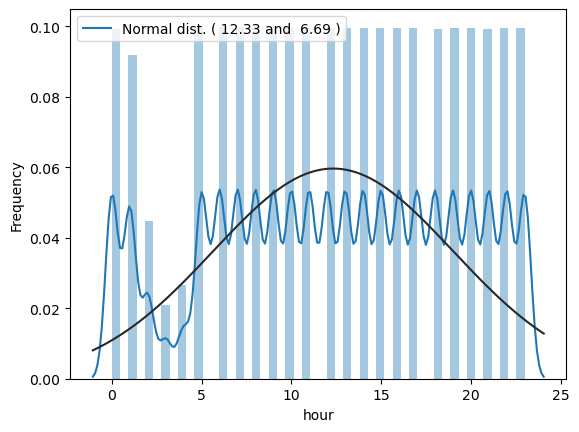

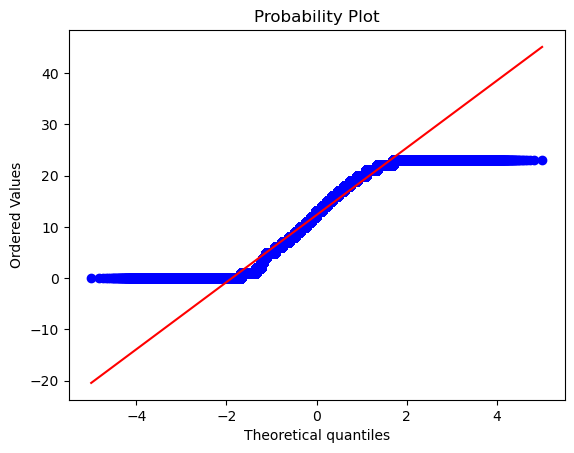

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 760.46 and sigma = 918.72


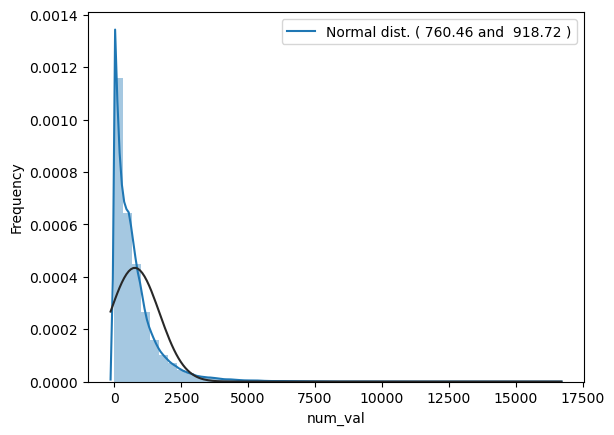

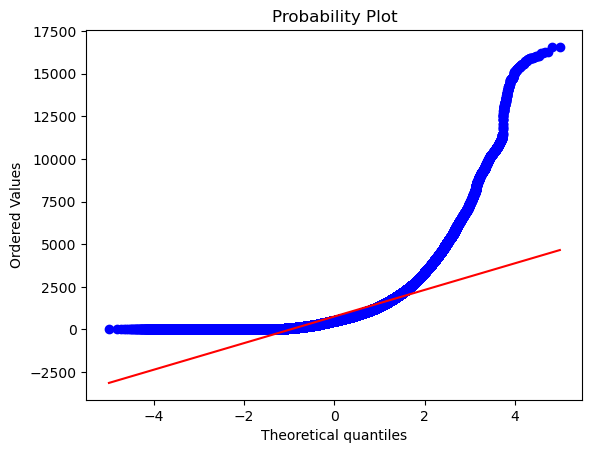

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 134.04 and sigma = 399.83


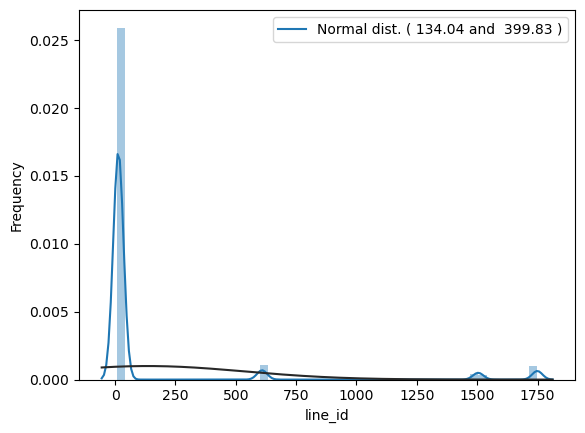

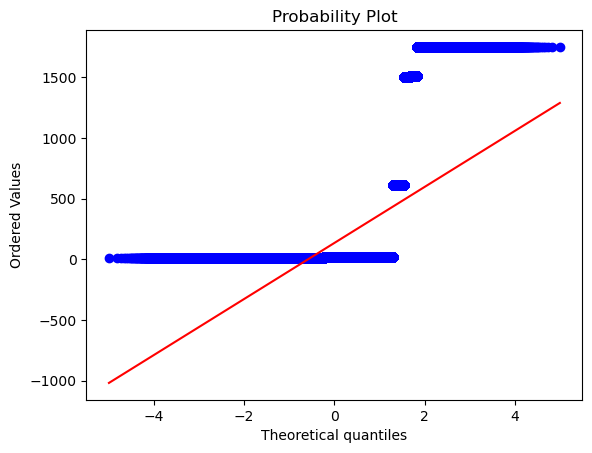

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 461.36 and sigma = 534.07


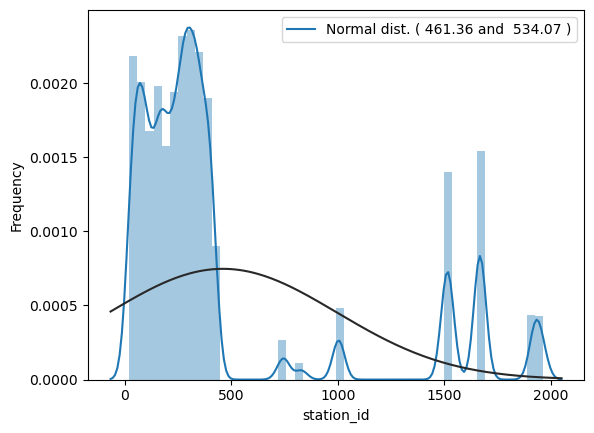

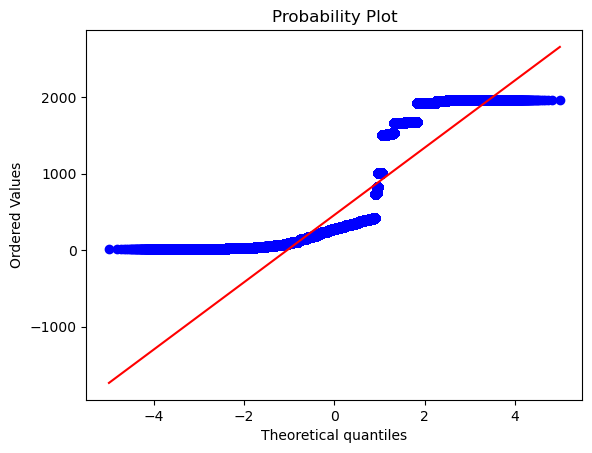

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 4.10 and sigma = 3.93


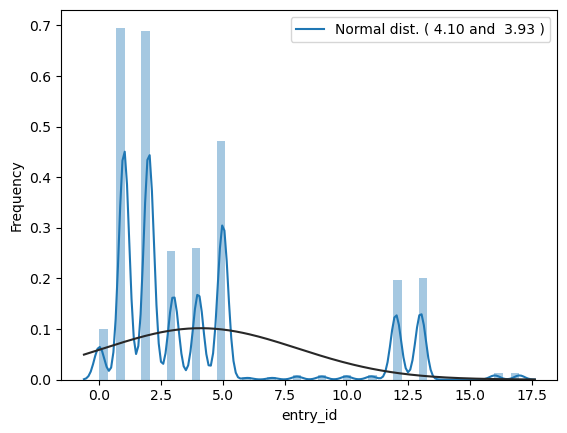

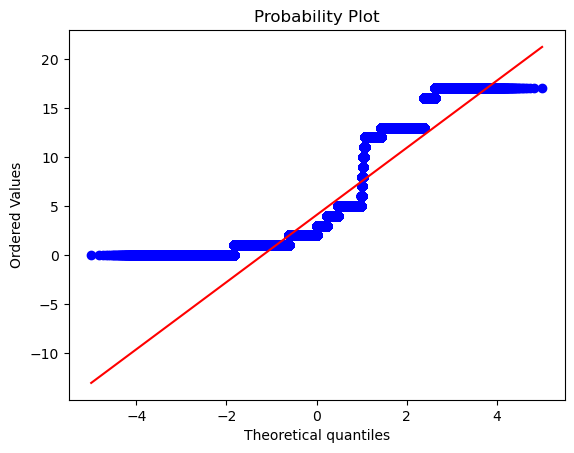

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 3.98 and sigma = 1.49


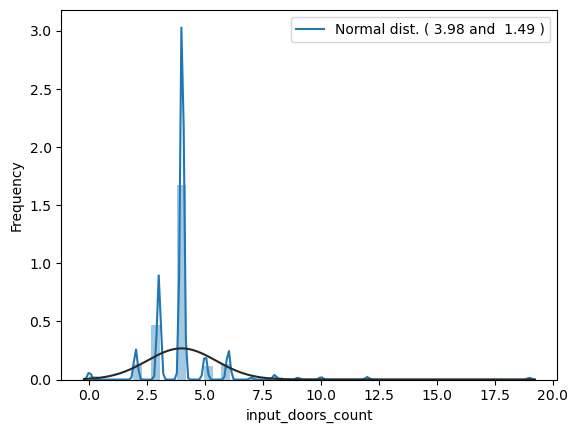

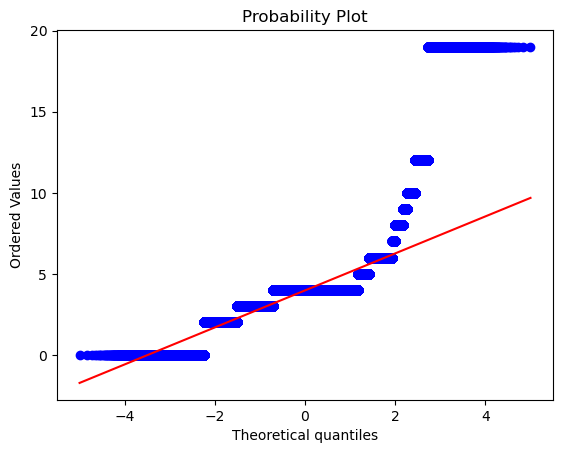

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 3.16 and sigma = 0.36


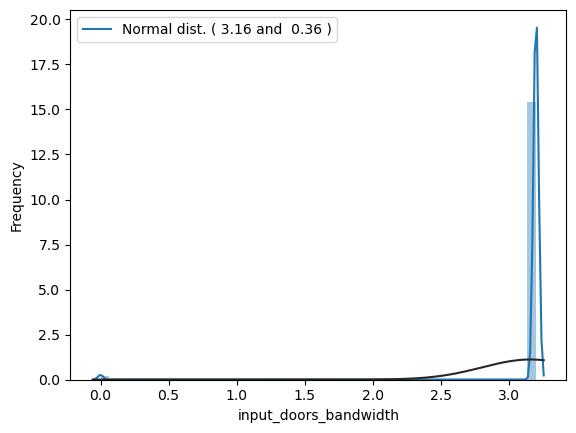

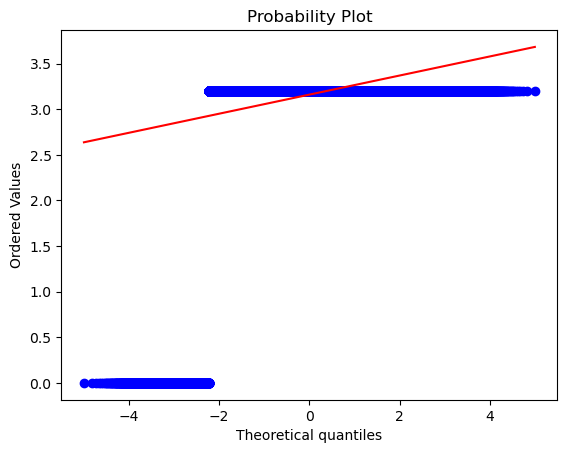

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 12.78 and sigma = 4.72


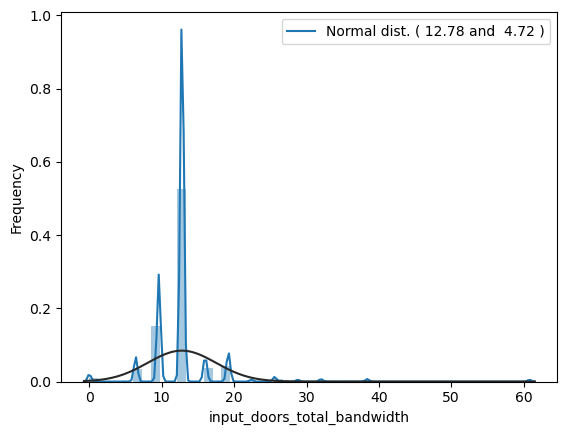

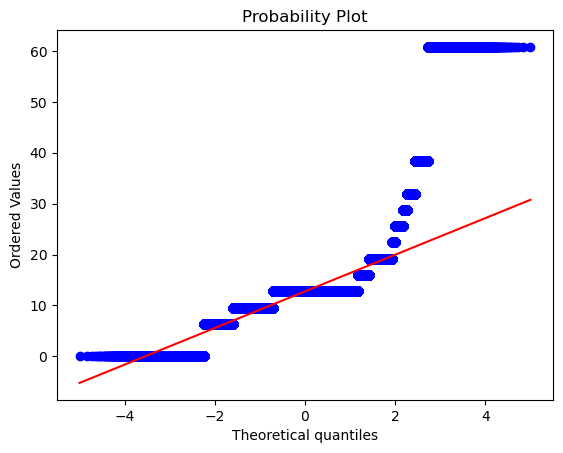

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 8.19 and sigma = 3.42


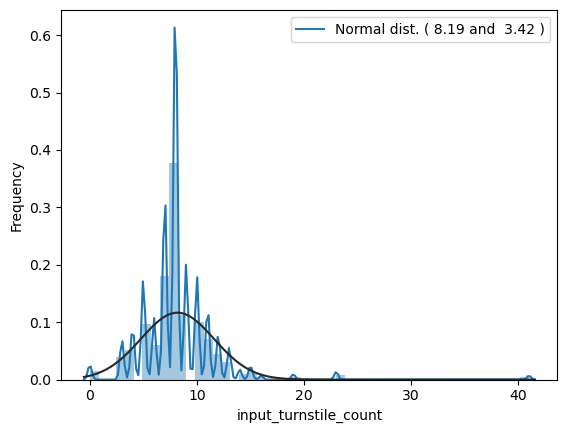

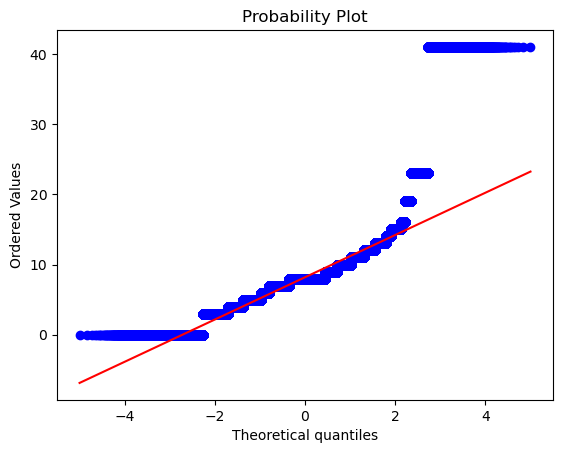

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 0.99 and sigma = 0.11


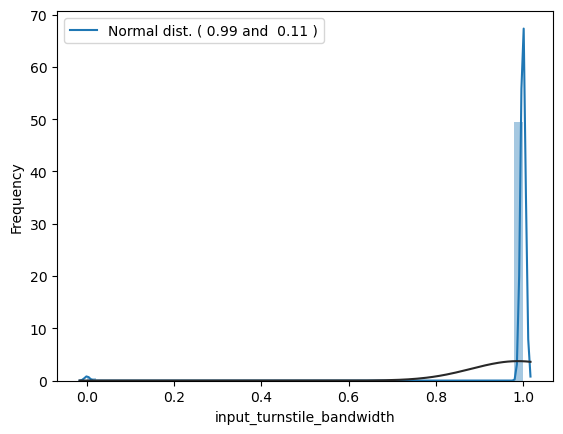

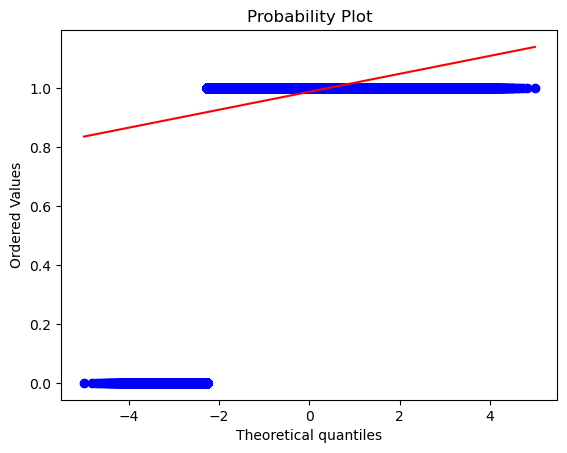

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 8.21 and sigma = 3.41


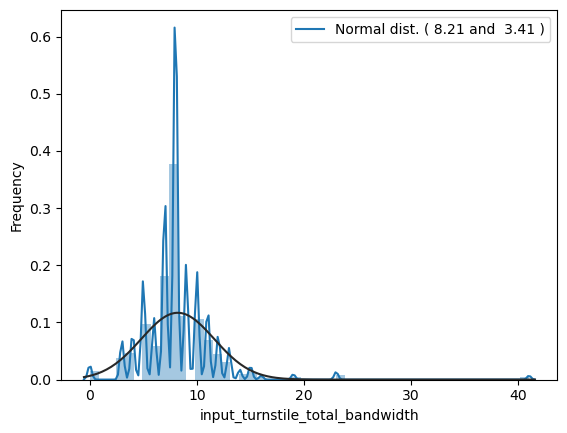

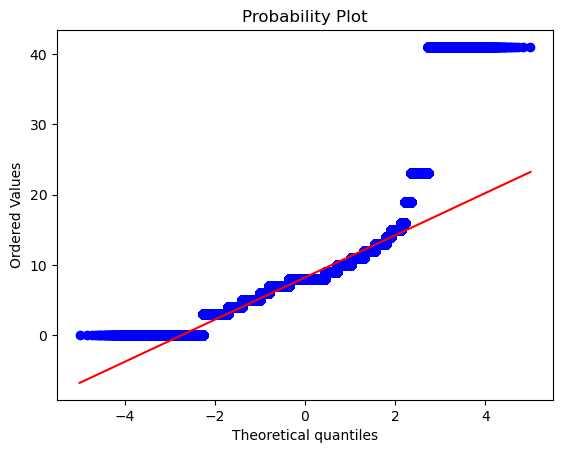

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 3.45 and sigma = 3.04


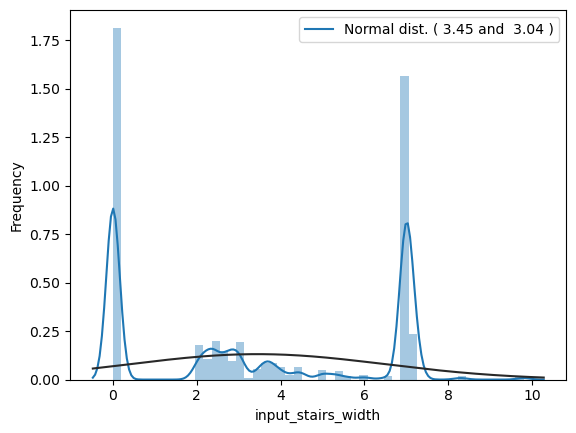

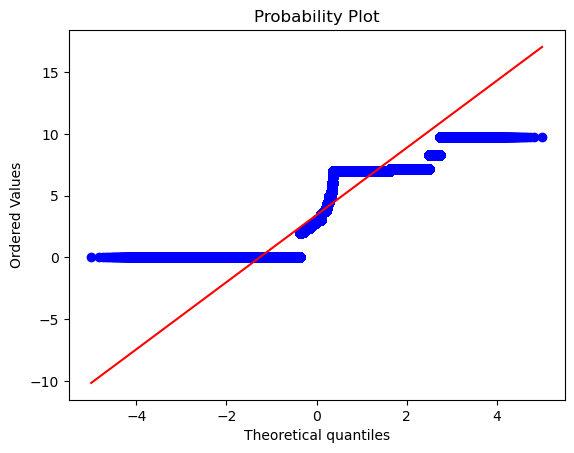

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 2.10 and sigma = 1.57


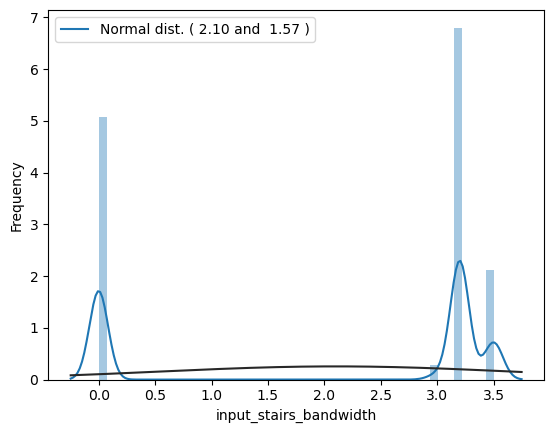

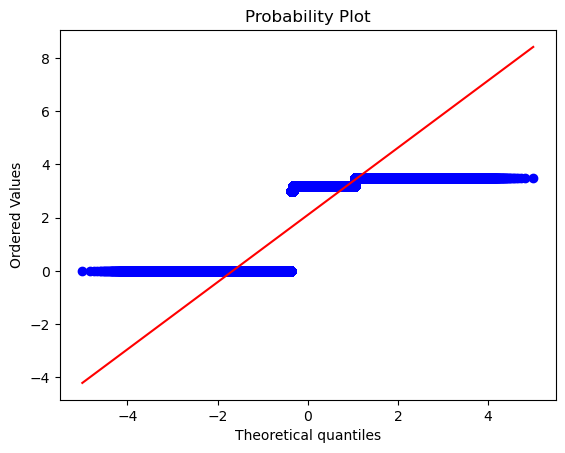

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 11.29 and sigma = 9.87


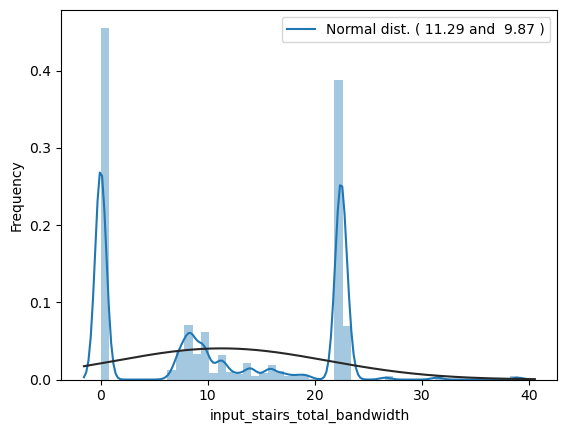

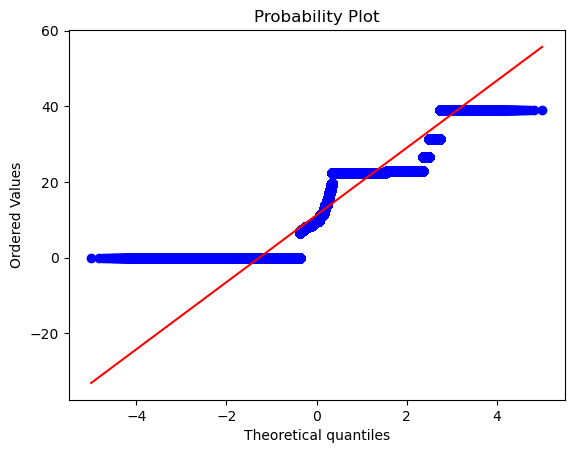

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 1.13 and sigma = 1.49


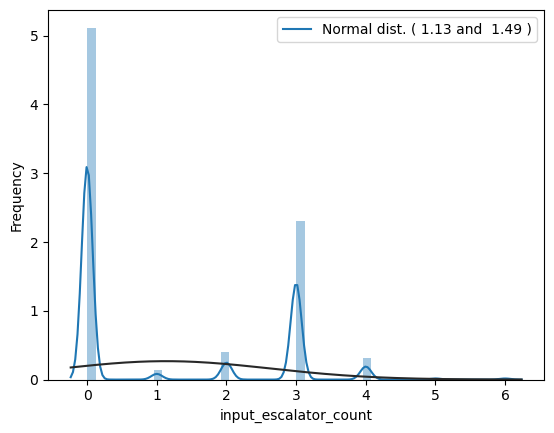

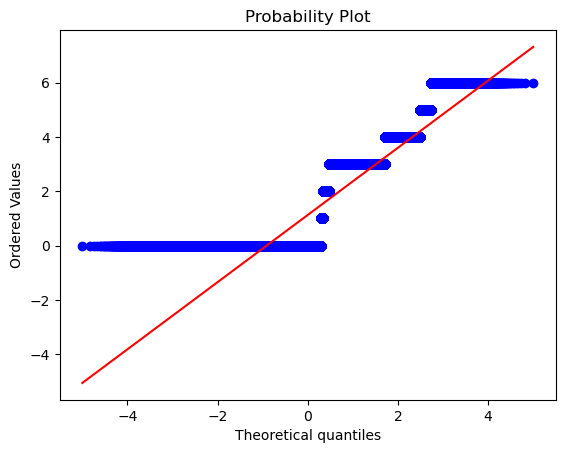

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 3.15 and sigma = 3.98


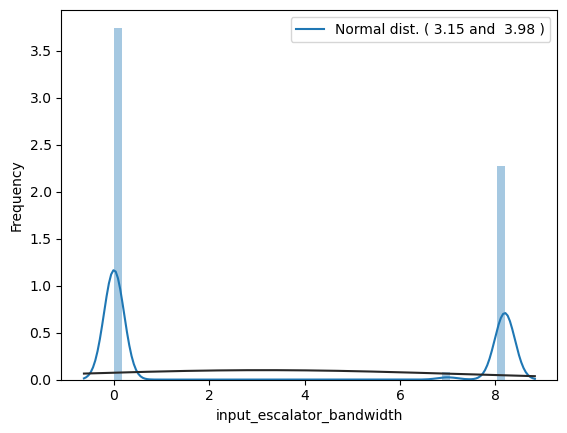

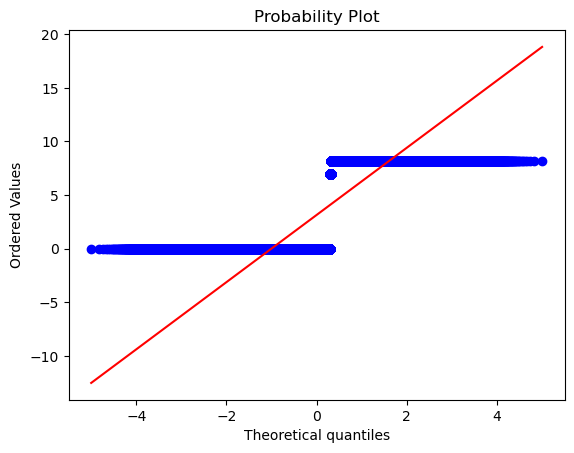

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 9.28 and sigma = 12.16


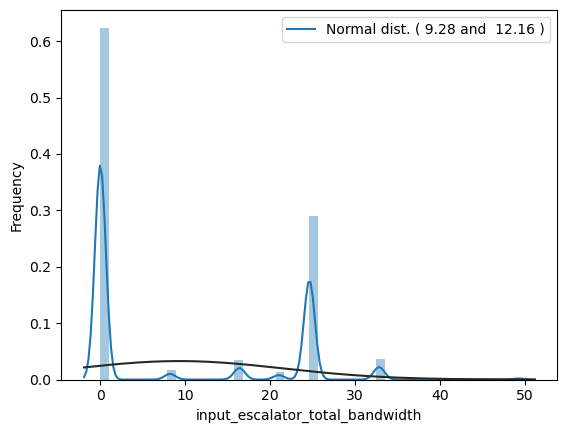

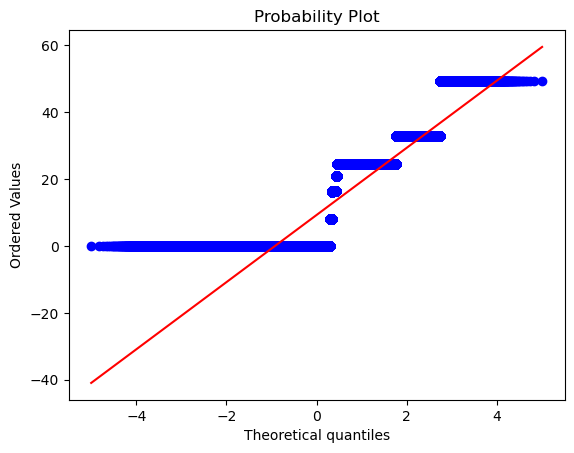

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 3.66 and sigma = 1.37


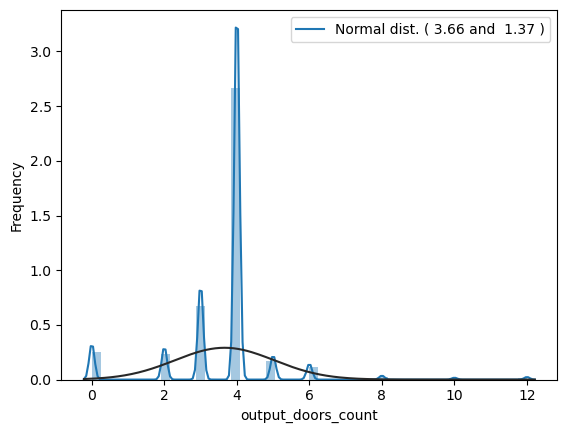

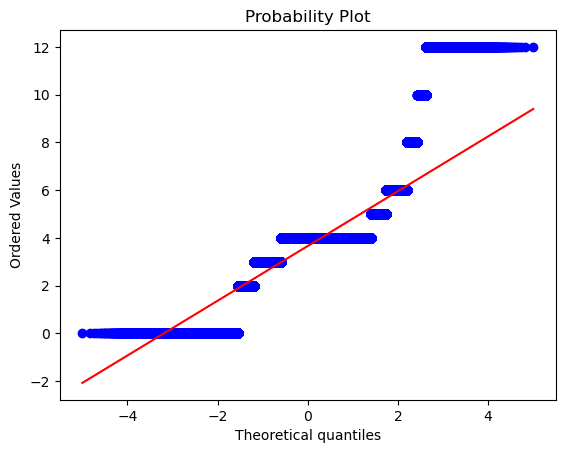

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 3.01 and sigma = 0.76


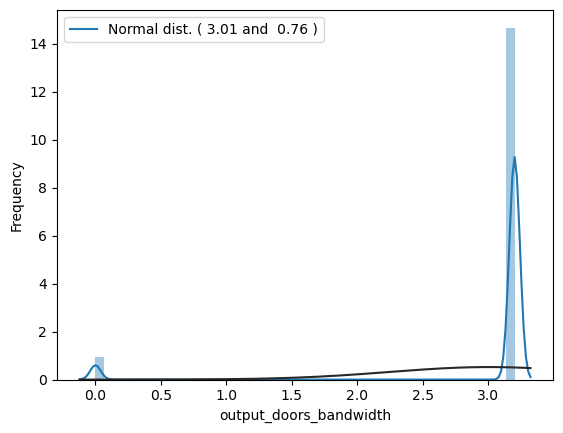

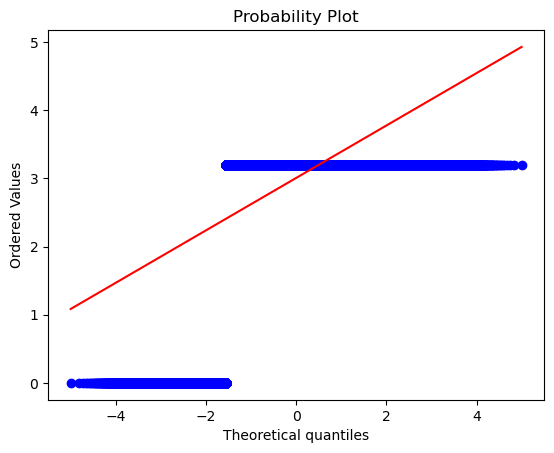

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 11.71 and sigma = 4.39


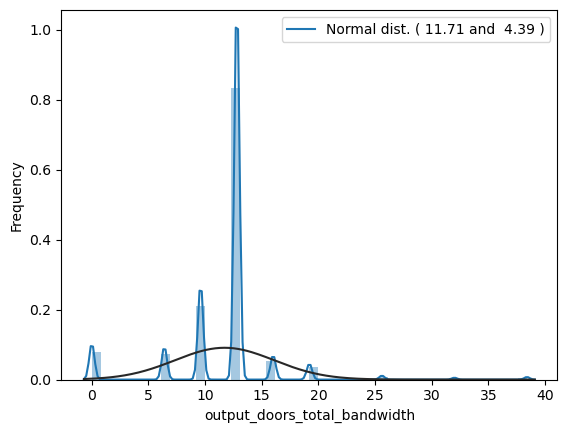

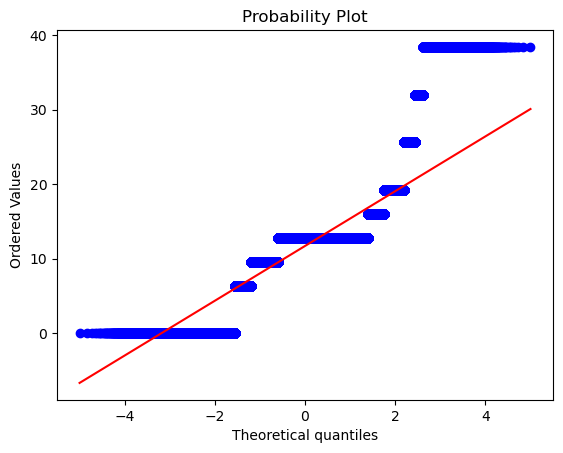

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 3.74 and sigma = 3.16


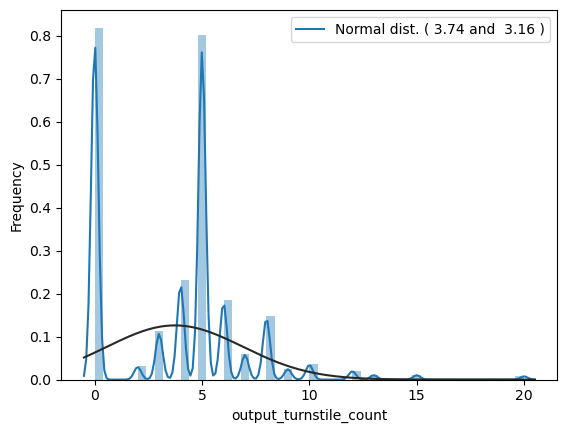

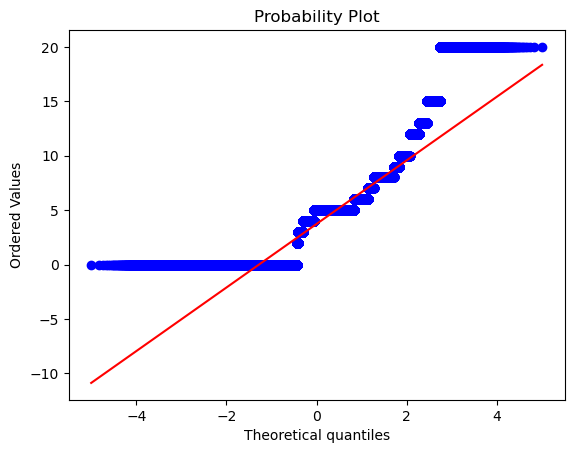

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 1.68 and sigma = 1.18


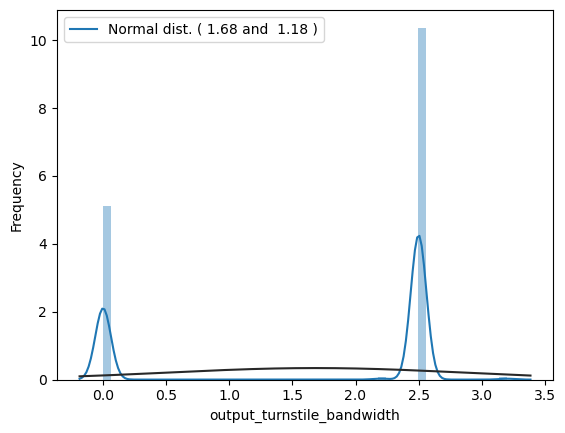

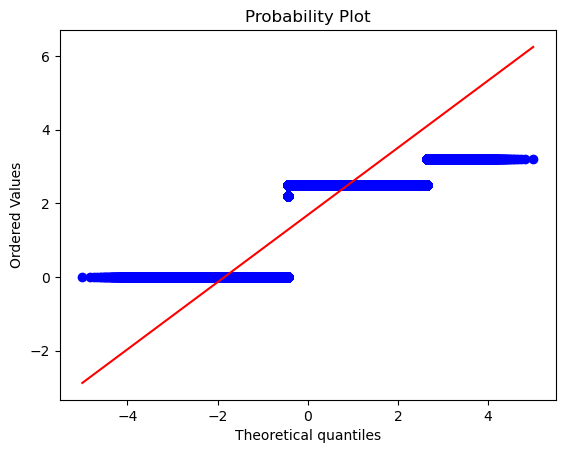

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 9.38 and sigma = 7.96


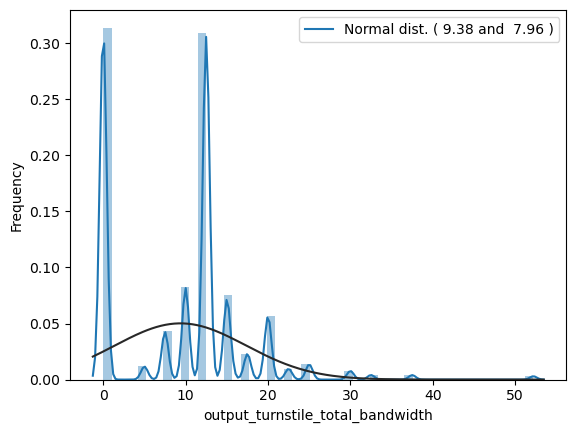

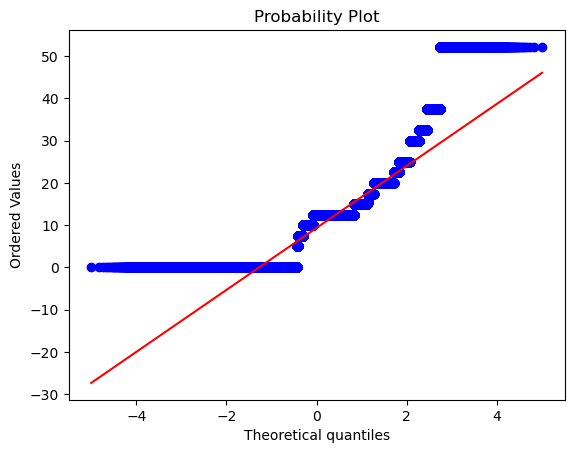

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 0.18 and sigma = 0.66


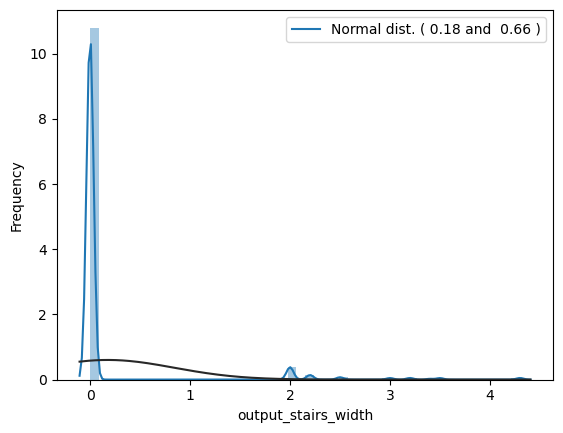

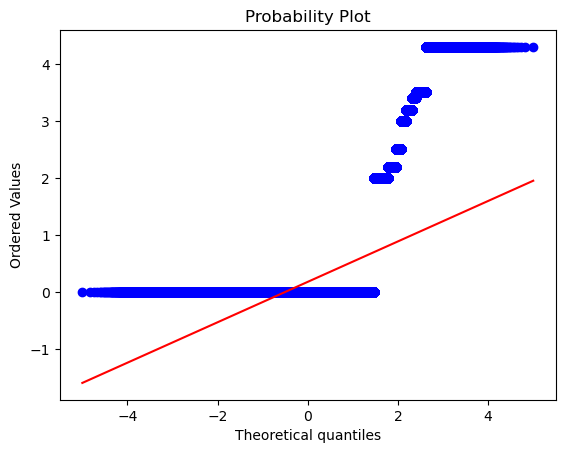

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 0.40 and sigma = 1.59


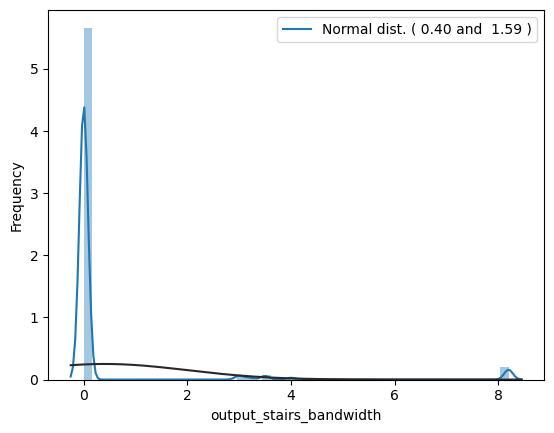

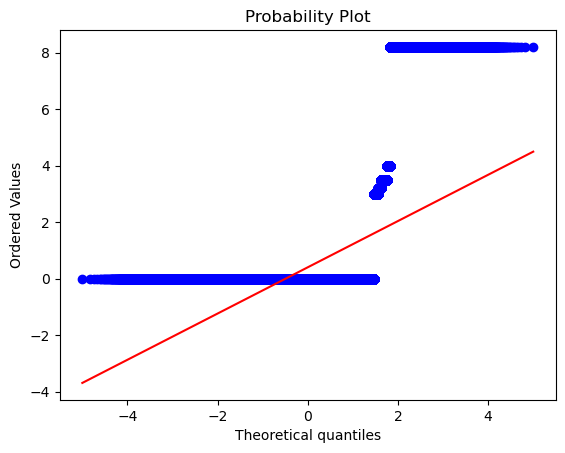

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 0.94 and sigma = 3.54


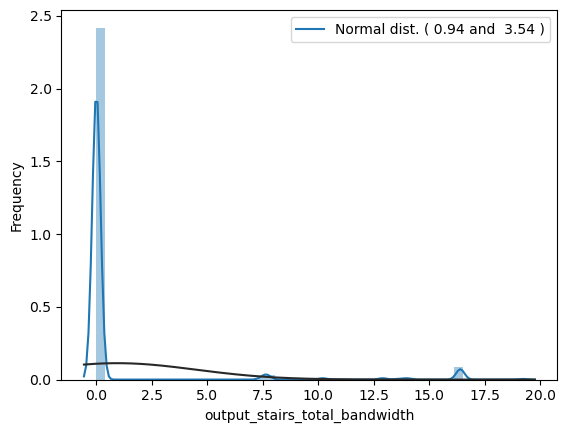

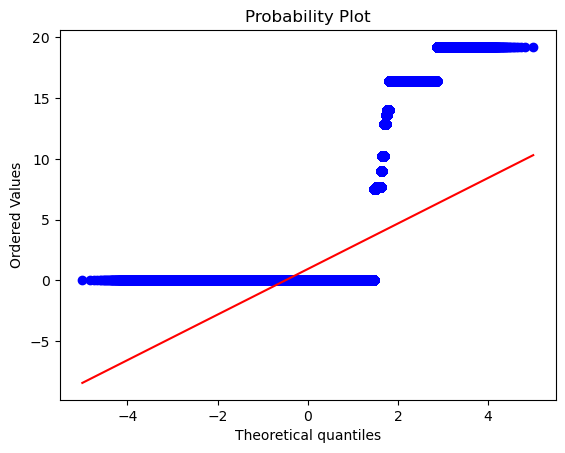

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 0.15 and sigma = 0.50


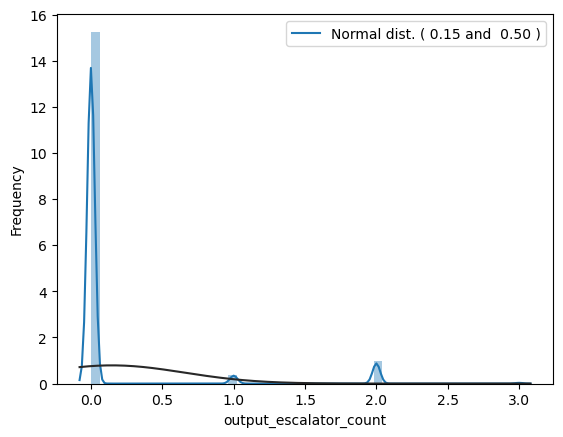

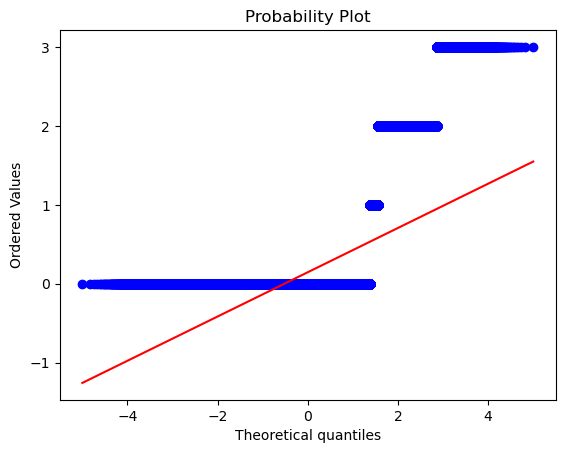

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 0.69 and sigma = 2.27


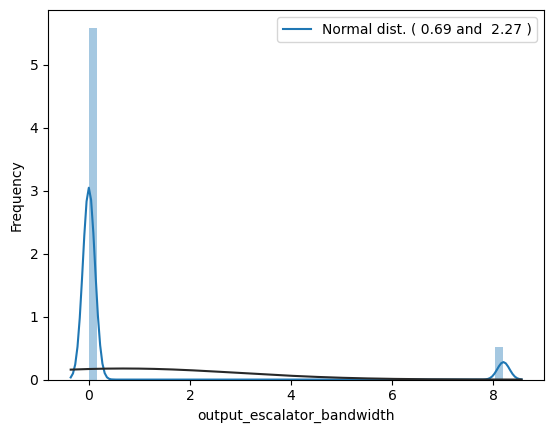

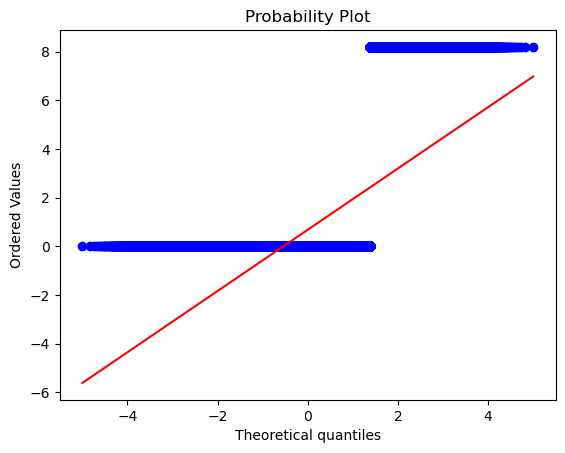

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 1.23 and sigma = 4.23


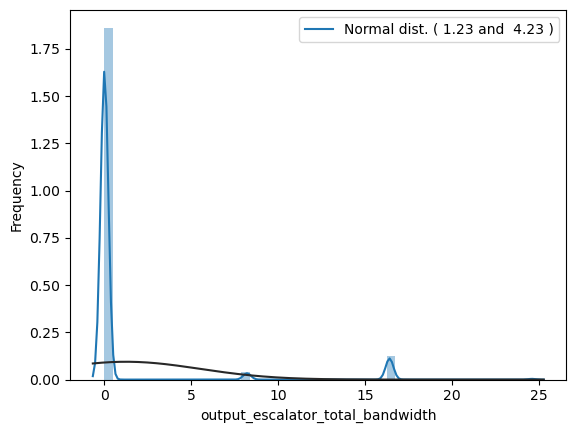

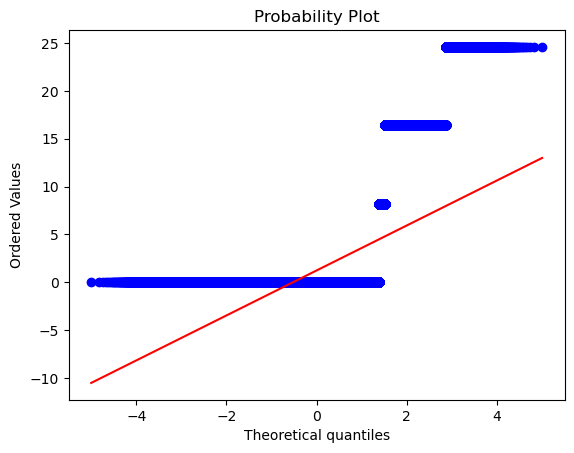

/tmp/ipykernel_25041/4224708234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[elem] , fit=norm);
/home/ml/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 9000104.15 and sigma = 72.90


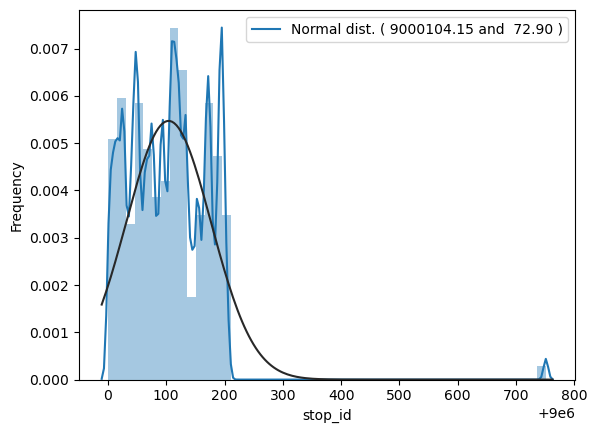

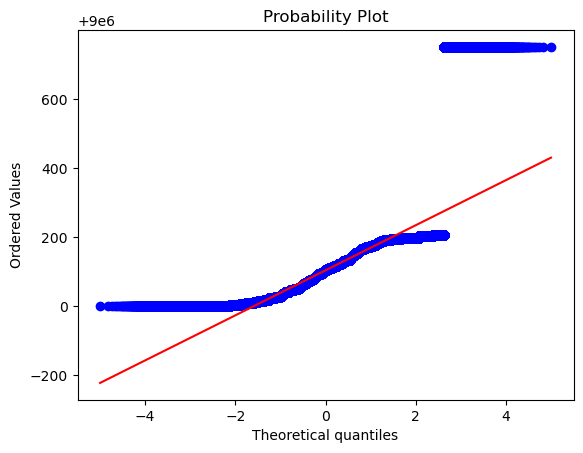

In [72]:
for elem  in  numeric_columns:
    sns.distplot(data[elem] , fit=norm);
    
    
    (mu, sigma) = norm.fit(data[elem])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
    plt.legend(['Normal dist. ( {:.2f} and  {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    
    
    fig = plt.figure()
    res = stats.probplot(data[elem], plot=plt)
    plt.show()

как вывод  ни одна колонка не  имеет четкого гаусиана на  картинках  , для  айди  делать выводы  по распредлелениям  нет  смысла  ,  есть много  лог нормальных  распределений с  тяжелыми правыми  и  левыми  хвостами  , так же можно  заметить  дисбаланс  в  некоторых  колонках  по  типу  количество  эскалаторов  или ширина  турникета  где  числа  1  и  2  имеет  огромное  количество  значений , в отличии  от  других  значений 

## 1.4 Определение численных характеристик наборов данных

In [18]:
data

,date,hour,line,station,num_val,line_id,line_name,station_id,entry_id,entry_name,...,output_turnstile_count,output_turnstile_bandwidth,output_turnstile_total_bandwidth,output_stairs_width,output_stairs_bandwidth,output_stairs_total_bandwidth,output_escalator_count,output_escalator_bandwidth,output_escalator_total_bandwidth,stop_id
0,2023-01-01,0,АРБАТСК-ПОКРОВСК,Арбатская АПЛ,373,12,АРБАТСК-ПОКРОВСК,131,5,Центр,...,5,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000057
1,2023-01-01,1,АРБАТСК-ПОКРОВСК,Арбатская АПЛ,6,12,АРБАТСК-ПОКРОВСК,131,5,Центр,...,5,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000057
2,2023-01-01,2,АРБАТСК-ПОКРОВСК,Арбатская АПЛ,1,12,АРБАТСК-ПОКРОВСК,131,5,Центр,...,5,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000057
3,2023-01-01,3,АРБАТСК-ПОКРОВСК,Арбатская АПЛ,2,12,АРБАТСК-ПОКРОВСК,131,5,Центр,...,5,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000057
4,2023-01-01,5,АРБАТСК-ПОКРОВСК,Арбатская АПЛ,38,12,АРБАТСК-ПОКРОВСК,131,5,Центр,...,5,2.5,12.5,0.0,0.0,0.0,0,0.0,0.0,9000057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416930,2023-08-21,19,КАЛУЖСКО-РИЖСКАЯ,Пр-кт Мира КРЛ,1757,15,КАЛУЖСКО-РИЖСКАЯ,251,5,Центр,...,6,2.5,15.0,0.0,0.0,0.0,0,0.0,0.0,9000099
2416931,2023-08-21,20,КАЛУЖСКО-РИЖСКАЯ,Пр-кт Мира КРЛ,1132,15,КАЛУЖСКО-РИЖСКАЯ,251,5,Центр,...,6,2.5,15.0,0.0,0.0,0.0,0,0.0,0.0,9000099
2416932,2023-08-21,21,КАЛУЖСКО-РИЖСКАЯ,Пр-кт Мира КРЛ,627,15,КАЛУЖСКО-РИЖСКАЯ,251,5,Центр,...,6,2.5,15.0,0.0,0.0,0.0,0,0.0,0.0,9000099
2416933,2023-08-21,22,КАЛУЖСКО-РИЖСКАЯ,Пр-кт Мира КРЛ,360,15,КАЛУЖСКО-РИЖСКАЯ,251,5,Центр,...,6,2.5,15.0,0.0,0.0,0.0,0,0.0,0.0,9000099


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2403614 entries, 0 to 2416934
Data columns (total 35 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   date                              object 
 1   hour                              int64  
 2   line                              object 
 3   station                           object 
 4   num_val                           int64  
 5   line_id                           int64  
 6   line_name                         object 
 7   station_id                        int64  
 8   entry_id                          int64  
 9   entry_name                        object 
 10  input_doors_count                 int64  
 11  input_doors_bandwidth             float64
 12  input_doors_total_bandwidth       float64
 13  input_turnstile_count             int64  
 14  input_turnstile_bandwidth         float64
 15  input_turnstile_total_bandwidth   float64
 16  input_stairs_width                float64

1. Общая загруженность станции

In [24]:
pos = data.groupby('station')['num_val'].sum()
pos

station
Авиамотор-я КалЛ     6584887
Автозаводская       23774622
Академическая       14092148
Александр. сад       7523474
Алексеевская         6811894
                      ...   
Щёлковская          31925540
Электрозав-я АПЛ     7334660
Юго-западная        21900060
Южная               10076636
Ясенево             12941144
Name: num_val, Length: 176, dtype: int64

2. Пропускная способность в процентах по отношению к средней
пропускной способности

In [34]:
propys = data['input_doors_count'].mean()

In [51]:
propys_stations  = data.groupby('station')['input_doors_count'].mean()

In [46]:
propys_stations['propys'] = propys

In [59]:
res = propys_stations / propys

In [61]:
res * 100

station
Авиамотор-я КалЛ    125.619497
Автозаводская       100.495597
Академическая        75.371698
Александр. сад      163.305346
Алексеевская        100.495597
                       ...    
Щёлковская          200.991195
Электрозав-я АПЛ    100.495597
Юго-западная        100.495597
Южная               100.495597
Ясенево             100.495597
Name: input_doors_count, Length: 176, dtype: float64

In [ ]:
3. Количественные характеристики входного и выходного
оборудования

In [63]:
daf = data[['input_doors_count',
'input_doors_bandwidth',  'input_doors_total_bandwidth' ,      
 'input_turnstile_count',            
'input_turnstile_bandwidth' ,        
 'input_turnstile_total_bandwidth',  
'input_stairs_width',                
'input_stairs_bandwidth' ,           
'input_stairs_total_bandwidth' ,     
'input_escalator_count' ,           
'input_escalator_bandwidth',        
'input_escalator_total_bandwidth' ,  
'output_doors_count',              
'output_doors_bandwidth' ,           
'output_doors_total_bandwidth' ,    
'output_turnstile_count' ,            
'output_turnstile_bandwidth',        
'output_turnstile_total_bandwidth' , 
'output_stairs_width' ,              
'output_stairs_bandwidth' ,          
'output_stairs_total_bandwidth' ,    
'output_escalator_count',              
'output_escalator_bandwidth' ,       
 'output_escalator_total_bandwidth'  ]]

In [64]:
daf.describe()

,input_doors_count,input_doors_bandwidth,input_doors_total_bandwidth,input_turnstile_count,input_turnstile_bandwidth,input_turnstile_total_bandwidth,input_stairs_width,input_stairs_bandwidth,input_stairs_total_bandwidth,input_escalator_count,...,output_doors_total_bandwidth,output_turnstile_count,output_turnstile_bandwidth,output_turnstile_total_bandwidth,output_stairs_width,output_stairs_bandwidth,output_stairs_total_bandwidth,output_escalator_count,output_escalator_bandwidth,output_escalator_total_bandwidth
count,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,...,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06,2.403614e+06
mean,3.980274e+00,3.159552e+00,1.277763e+01,8.186796e+00,9.883900e-01,8.212228e+00,3.446250e+00,2.101795e+00,1.128927e+01,1.131876e+00,...,1.171514e+01,3.736635e+00,1.681735e+00,9.377325e+00,1.762050e-01,4.007234e-01,9.354882e-01,1.460883e-01,6.844347e-01,1.232125e+00
std,1.487557e+00,3.574898e-01,4.726374e+00,3.423865e+00,1.071225e-01,3.414944e+00,3.042675e+00,1.566077e+00,9.875238e+00,1.490983e+00,...,4.386272e+00,3.164972e+00,1.175775e+00,7.960524e+00,6.619321e-01,1.586685e+00,3.537062e+00,5.042172e-01,2.268020e+00,4.225279e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,3.200000e+00,1.280000e+01,7.000000e+00,1.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,9.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,3.200000e+00,1.280000e+01,8.000000e+00,1.000000e+00,8.000000e+00,3.000000e+00,3.200000e+00,9.600000e+00,0.000000e+00,...,1.280000e+01,5.000000e+00,2.500000e+00,1.250000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.000000e+00,3.200000e+00,1.280000e+01,9.000000e+00,1.000000e+00,9.000000e+00,7.000000e+00,3.200000e+00,2.240000e+01,3.000000e+00,...,1.280000e+01,5.000000e+00,2.500000e+00,1.250000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.900000e+01,3.200000e+00,6.080000e+01,4.100000e+01,1.000000e+00,4.100000e+01,9.800000e+00,3.500000e+00,3.900000e+01,6.000000e+00,...,3.840000e+01,2.000000e+01,3.200000e+00,5.220000e+01,4.300000e+00,8.200000e+00,1.920000e+01,3.000000e+00,8.200000e+00,2.460000e+01


## 1.5 Формирование итогового набора данных

в прошлых  пунктах  мной уже  был  сформирован  итоговый  набор данных 

## 1.6 Подготовка отчета

* как  итог  мной были загружены  и  предобработанны данные  ,  загруженные  согласно исходным  наборам  в базу  ,  написано текстовое  описание  по каждому атрибуту , выделены  атрибуты для класстеризации , добавленные  новые  данныъ  , так же  проведен  анализ  нормальности распределений , сформирован итоговый  набор ,а так же определенны  численные  хараткеристики 